<a href="https://colab.research.google.com/github/RawanKhaled20/Unsupervised_Seeds_Clustering/blob/main/Seeds_Unsupervised_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.datasets import load_iris
from sklearn.manifold import TSNE
iris=load_iris()
data=iris.data
species=iris.target

In [ ]:
!pip install -q kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"rawankhaled20","key":"f5a17aecb67ca4675b425dadbe4ab60e"}'}

In [ ]:
!mkdir -p ~/.kaggle

In [ ]:
!cp kaggle.json ~/.kaggle/

In [ ]:
!kaggle datasets download -d dongeorge/seed-from-uci

  0% 0.00/3.71k [00:00<?, ?B/s]
100% 3.71k/3.71k [00:00<00:00, 6.90MB/s]


In [ ]:
!unzip seed-from-uci.zip

Archive:  seed-from-uci.zip
  inflating: Seed_Data.csv           


In [ ]:
import pandas as pd

seeds=pd.read_csv('Seed_Data.csv')
seeds.head()

,A,P,C,LK,WK,A_Coef,LKG,target
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,0
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,0
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,0
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,0
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,0


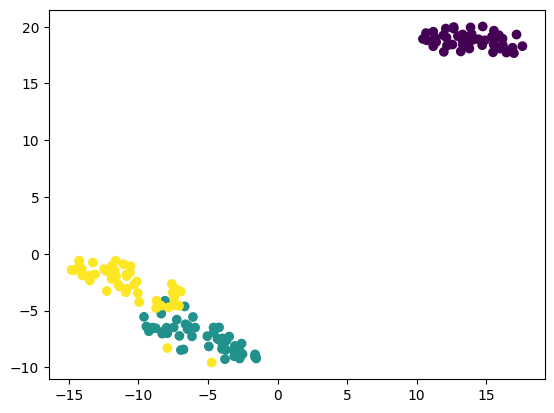

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

model=TSNE(learning_rate=100)
transformed=model.fit_transform(data)
xs=transformed[:,0]
ys=transformed[:,1]
plt.scatter(xs,ys,c=species)
#plt.legend(species)
#sns.scatterplot(xs,ys,hue=species)
plt.show()

In [ ]:
# Preparing seeds for clustering by dropping the target column

seeds=seeds.drop(['target'],axis=1)
seeds.head()

,A,P,C,LK,WK,A_Coef,LKG
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(seeds)

from sklearn.cluster import MeanShift
mean_shift = MeanShift(bandwidth=0.8)
seed_labels = mean_shift.fit_predict(X_scaled)

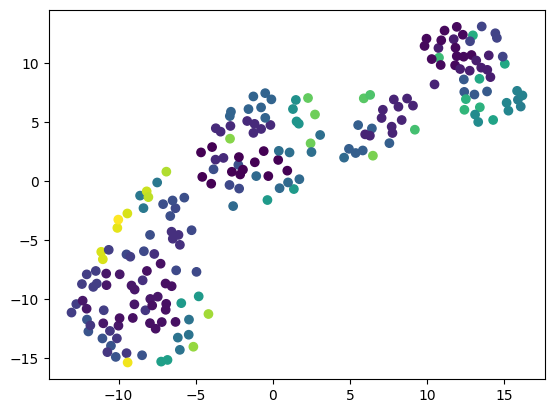

In [ ]:
# TSNE on Seed Data

# Create a TSNE instance: model
model = TSNE(learning_rate=200)

# Apply fit_transform to samples: tsne_features
tsne_features = model.fit_transform(seeds)

# Select the 0th feature: xs
xs = tsne_features[:,0]

# Select the 1st feature: ys
ys = tsne_features[:,1]

# Scatter plot, coloring by variety_numbers
plt.scatter(xs,ys,c=seed_labels)
plt.show()

# the t-SNE visualization manages to separate the 3 varieties of grain samples.
# Annotate the points
# for x, y, seedlabel in zip(xs, ys, seed_labels):
#     plt.annotate(seedlabel, (x, y), fontsize=5, alpha=0.75)

In [ ]:
from sklearn.metrics import silhouette_score

# Evaluate clustering using silhouette score (optional)
silhouette_avg = silhouette_score(X_scaled, seed_labels)
print(f"Silhouette Score: {silhouette_avg}")


Silhouette Score: 0.20111413793330848


In [ ]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(seeds)

# Perform hierarchical clustering
clustering = AgglomerativeClustering(n_clusters=3, linkage='ward')
seed_labels = clustering.fit_predict(X_scaled)

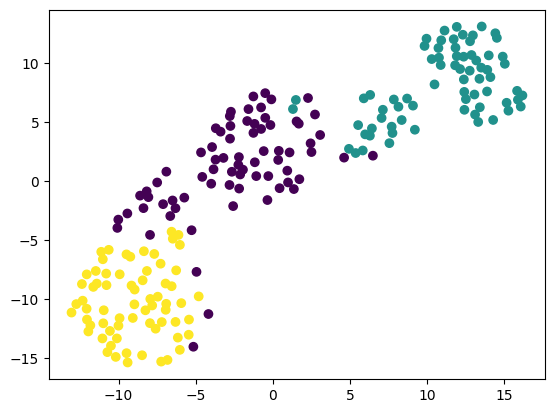

In [ ]:
# TSNE on Seed Data

# Create a TSNE instance: model
model = TSNE(learning_rate=200)

# Apply fit_transform to samples: tsne_features
tsne_features = model.fit_transform(seeds)

# Select the 0th feature: xs
xs = tsne_features[:,0]

# Select the 1st feature: ys
ys = tsne_features[:,1]

# Scatter plot, coloring by variety_numbers
plt.scatter(xs,ys,c=seed_labels)
plt.show()

# the t-SNE visualization manages to separate the 3 varieties of grain samples.
# Annotate the points
# for x, y, seedlabel in zip(xs, ys, seed_labels):
#     plt.annotate(seedlabel, (x, y), fontsize=5, alpha=0.75)

In [ ]:
from sklearn.metrics import silhouette_score

# Evaluate clustering using silhouette score (optional)
silhouette_avg = silhouette_score(X_scaled, seed_labels)
print(f"Silhouette Score: {silhouette_avg}")


Silhouette Score: 0.3926339709101015


In [ ]:
from sklearn.cluster import KMeans

model=KMeans(n_clusters=3)
model.fit(seeds)
seed_labels=model.fit_predict(seeds)
centroids=model.cluster_centers_
centroids

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([[11.96441558, 13.27480519,  0.8522    ,  5.22928571,  2.87292208,
         4.75974026,  5.08851948],
       [18.72180328, 16.29737705,  0.88508689,  6.20893443,  3.72267213,
         3.60359016,  6.06609836],
       [14.64847222, 14.46041667,  0.87916667,  5.56377778,  3.27790278,
         2.64893333,  5.19231944]])

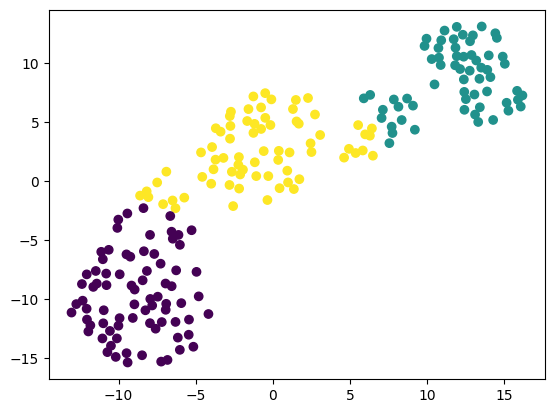

In [ ]:
# TSNE on Seed Data

# Create a TSNE instance: model
model = TSNE(learning_rate=200)

# Apply fit_transform to samples: tsne_features
tsne_features = model.fit_transform(seeds)

# Select the 0th feature: xs
xs = tsne_features[:,0]

# Select the 1st feature: ys
ys = tsne_features[:,1]

# Scatter plot, coloring by variety_numbers
plt.scatter(xs,ys,c=seed_labels)
plt.show()

# the t-SNE visualization manages to separate the 3 varieties of grain samples.
# Annotate the points
# for x, y, seedlabel in zip(xs, ys, seed_labels):
#     plt.annotate(seedlabel, (x, y), fontsize=5, alpha=0.75)

In [ ]:
from sklearn.metrics import silhouette_score

# Evaluate clustering using silhouette score (optional)
silhouette_avg = silhouette_score(X_scaled, seed_labels)
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.3830915666387984
